#**Linear Regression**

*There are some ways to realize linear regression geometrically*

##Simple linear regression with one feature##

In [ ]:
import numpy as np

features = np.array([1,2,3,5,6,7])
labels = np.array([155, 197, 244, 356, 407, 448])

In [ ]:
def square_trick(b, w, x, y, lr):
  predicted_price = b + w*x
  b = b + lr*(y-predicted_price)
  w = w + x*lr*(y-predicted_price)
  return b,w

In [ ]:
import matplotlib
from matplotlib import pyplot

def draw_line(slope, y_intercept, color='grey', linewidth=0.7, starting=0, ending=8):
    x = np.linspace(starting, ending, 1000)
    pyplot.plot(x, y_intercept + slope*x, linestyle='-', color=color, linewidth=linewidth)

def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    pyplot.scatter(X, y)
    pyplot.xlabel('number of rooms')
    pyplot.ylabel('prices')

(99.66677058296058, 49.90166946687205)

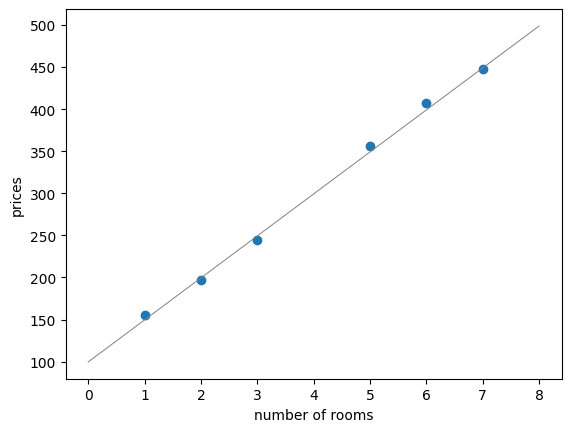

In [ ]:
import random
def linear_regression(features, labels, lr=0.01, epochs=10000):
    b = random.random()
    w = random.random()
    for epoch in range(epochs):
      i = random.randint(0, len(features)-1)
      b, w = square_trick(b, w, features[i], labels[i], lr)
    return b, w

b, w = linear_regression(features, labels)
draw_line(w, b)
plot_points(features, labels)
b,w

(100.44128567735413, 50.0811603102719)

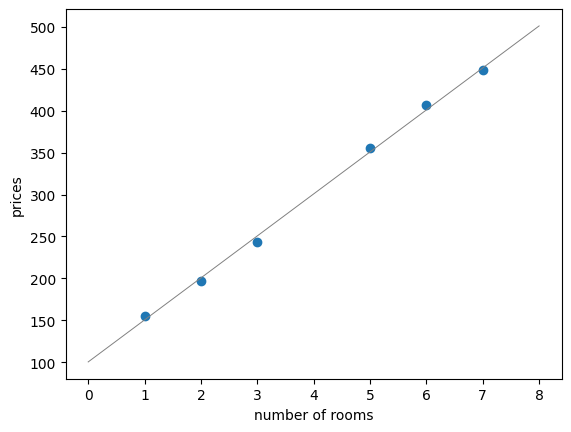

In [ ]:
import random
def linear_regression(features, labels, lr=0.01, epochs=10000):
    b = random.random()
    w = random.random()
    for epoch in range(epochs):
      for i in range(len(features)):
        b, w = square_trick(b, w, features[i], labels[i], lr)
    return b, w

b, w = linear_regression(features, labels)
draw_line(w, b)
plot_points(features, labels)
b,w

##General linear regression with several features##

In [ ]:
import numpy as np

features = np.array([[1,2,3,5,6,7],
                    [10, 20, 30, 50, 60, 70]])
labels = np.array([155, 197, 244, 356, 407, 448])
features = features.T
features

array([[ 1, 10],
       [ 2, 20],
       [ 3, 30],
       [ 5, 50],
       [ 6, 60],
       [ 7, 70]])

In [ ]:
features = (features - features.mean(axis=0)) / features.std(axis=0)
labels = (labels - labels.mean()) / labels.std()
features

array([[-1.38873015, -1.38873015],
       [-0.9258201 , -0.9258201 ],
       [-0.46291005, -0.46291005],
       [ 0.46291005,  0.46291005],
       [ 0.9258201 ,  0.9258201 ],
       [ 1.38873015,  1.38873015]])

In [ ]:
def square_trick_mod(b, w, x, y, lr):
  predicted_price = b + sum([a[0]*a[1] for a in zip(w,x)])
  b = b + lr*(y-predicted_price)
  for i in range(len(w)):
      w[i] = w[i] + x[i]*lr*(y-predicted_price)
  return b,w

#NOT WORKS#

In [ ]:
import random

b = random.random()
w = [random.random() for i in range(features.shape[0])]

square_trick_mod(b, w, features[0], labels[0])

In [ ]:
import random
def linear_regression(features, labels, lr=0.01, epochs=1000):
    b = random.random()
    w = [random.random() for i in range(len(features[0]))]
    for epoch in range(epochs):
      i = random.randint(0, len(features)-1)
      b, w = square_trick_mod(b, w, features[i], labels[i], lr)
    return b, w


b, w = linear_regression(features, labels)
print(b, w)

# x = features
# labels = labels
# print(features[0], labels)

# # Рисуем точки и линию
# plt.figure(figsize=(8, 6))
# plot_points(x[0], labels)  # Вход должен быть двумерным
# draw_line(w, b, x_range=(x.min(), x.max()))
# plt.show()

-0.0011310139175609458 [0.4564765207959512, 0.543285563463691]


In [ ]:
y = 0.4564765207959512*4 + 0.543285563463691*40 -0.0011310139175609458
y

23.556197607813882

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def draw_line(w, b, x_range):
    """
    Рисует линию регрессии для двумерных данных.

    Args:
        w: Список весов [w1, w2, ...].
        b: Смещение (bias).
        x_range: Диапазон значений x для построения линии.
    """
    # Поддержка только для 1D данных (одного признака)
    if len(w) > 1:
        raise ValueError("draw_line поддерживает только одномерные данные")

    x = np.linspace(x_range[0], x_range[1], 100)
    y = w[0] * x + b
    plt.plot(x, y, label=f"y = {w[0]:.2f}x + {b:.2f}", color="orange")
    plt.legend()

def plot_points(features, labels):
    """
    Строит точки данных на графике.

    Args:
        features: Массив признаков (для одномерных данных).
        labels: Массив целевых значений.
    """
    if features.shape[1] > 1:
        raise ValueError("plot_points поддерживает только одномерные данные")

    plt.scatter(features, labels, label="Данные", color="blue", alpha=0.6)
    plt.xlabel("Признак (x)")
    plt.ylabel("Целевое значение (y)")
    plt.title("Линейная регрессия")
    plt.grid(True)
    plt.legend()


In [ ]:
def mod_linear_regression(features, labels, lr=0.01, epochs=10000):
  b = random.random()
  w = [random.random() for i in range(features.shape[0])]

  for epoch in range(epochs):
    i = random.randint(0, features.shape[1]-1)
    b, w[j] = mod_square_trick(b, w[j], features[j][i], labels[i], lr)
    # b = b + lr*()
    # for j in range(features.shape[0]):
  return b, w

# def mod_linear_regression(features, labels, lr=0.01, epochs=10000):
#   b = random.random()
#   w = [random.random() for i in range(features.shape[0])]
#   predicted_price = b + w*x

#   b = b + lr*()


mod_linear_regression(features, labels)

<ipython-input-2-1df0fc20f1f2>:2: RuntimeWarning: overflow encountered in scalar multiply
  predicted_price = b + w*x
<ipython-input-2-1df0fc20f1f2>:3: RuntimeWarning: invalid value encountered in scalar add
  b = b + lr*(y-predicted_price)
<ipython-input-2-1df0fc20f1f2>:4: RuntimeWarning: invalid value encountered in scalar add
  w = w + x*lr*(y-predicted_price)


(nan, [51.09859520063229, nan])

<ipython-input-11-40e76fe349e8>:13: RuntimeWarning: invalid value encountered in scalar add
  b = b + lr * (y - predicted_price)
<ipython-input-11-40e76fe349e8>:15: RuntimeWarning: invalid value encountered in scalar add
  w[i] = w[i] + lr * (y - predicted_price) * x[i]


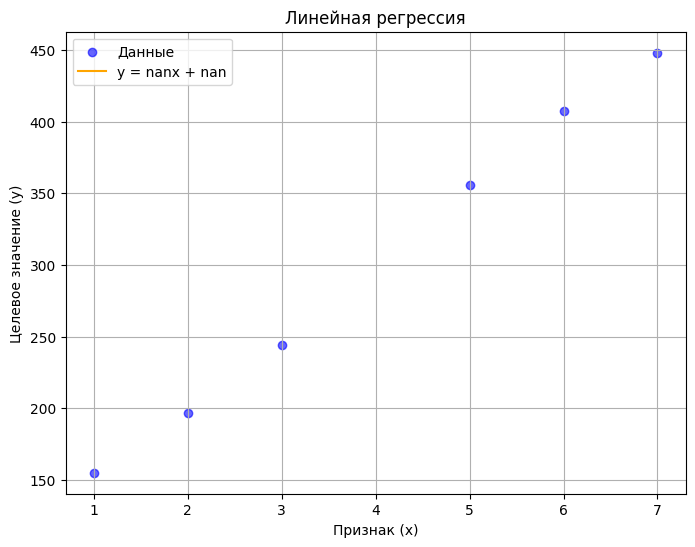

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Данные
features = np.array([[1, 2, 3, 5, 6, 7],
                     [10, 20, 30, 50, 60, 70]])
labels = np.array([155, 197, 244, 356, 407, 448])

# Функция обновления весов и смещения
def square_trick_mod(b, w, x, y, lr):
    predicted_price = b + np.dot(w, x)
    b = b + lr * (y - predicted_price)
    for i in range(len(w)):
        w[i] = w[i] + lr * (y - predicted_price) * x[i]
    return b, w

# Функция рисования линии регрессии
def draw_line(w, b, x_range):
    if len(w) > 1:
        raise ValueError("draw_line поддерживает только одномерные данные")

    x = np.linspace(x_range[0], x_range[1], 100)
    y = w[0] * x + b
    plt.plot(x, y, label=f"y = {w[0]:.2f}x + {b:.2f}", color="orange")
    plt.legend()

# Функция для рисования точек
def plot_points(features, labels):
    if features.ndim > 1 and features.shape[0] > 1:
        raise ValueError("plot_points поддерживает только одномерные данные")

    plt.scatter(features, labels, label="Данные", color="blue", alpha=0.6)
    plt.xlabel("Признак (x)")
    plt.ylabel("Целевое значение (y)")
    plt.title("Линейная регрессия")
    plt.grid(True)
    plt.legend()

# Линейная регрессия
def linear_regression(features, labels, lr=0.1, epochs=10000):
    b = random.random()
    w = [random.random() for _ in range(features.shape[1])]
    for epoch in range(epochs):
      for i in range(features.shape[0]):  # Проход по всем точкам
          b, w = square_trick_mod(b, w, features[i], labels[i], lr)

    return b, w

# Транспонирование данных для корректной работы алгоритма
features = features.T

# Обучение модели
b, w = linear_regression(features, labels)

# Рисование графика
plt.figure(figsize=(8, 6))
plot_points(features[:, 0], labels)
draw_line([w[0]], b, x_range=(features[:, 0].min(), features[:, 0].max()))
plt.show()


#WORKS#

In [ ]:
import numpy as np
import random

# Normalize features and labels
def normalize(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    return (data - mean) / std, mean, std

# Denormalize predictions
def denormalize(data, mean, std):
    return data * std + mean

# Square trick for weight updates
def square_trick_mod(b, w, x, y, lr):
    # Prediction
    predicted_price = b + np.dot(w, x)

    # Gradient update
    error = y - predicted_price
    b += lr * error
    w += lr * error * x  # Element-wise update for weights

    return b, w

# Linear regression function
def linear_regression(features, labels, lr=0.01, epochs=1000):
    # Initialize weights and bias
    b = random.random()
    w = np.random.rand(features.shape[1])

    # Training loop
    for epoch in range(epochs):
        for i in range(features.shape[0]):
            b, w = square_trick_mod(b, w, features[i], labels[i], lr)

    return b, w

# Data preprocessing
# features = np.array([[1, 2, 3, 5, 6, 7],
#                      [10, 20, 30, 50, 60, 70]]).T  # Transpose for correct shape
# labels = np.array([155, 197, 244, 356, 407, 448])

# Normalize features and labels
features, features_mean, features_std = normalize(features)
labels, labels_mean, labels_std = normalize(labels)

# Train the model
b, w = linear_regression(features, labels, lr=0.01, epochs=10000)

# Print results
print(f"Bias (b): {b}, Weights (w): {w}")

# Make predictions on normalized features
predictions_normalized = b + np.dot(features, w)

# Scale predictions back to the original range
predictions = denormalize(predictions_normalized, labels_mean, labels_std)

# Print predictions
print("Predictions:", predictions)

# Compare predictions with actual labels
print("Actual labels:", labels * labels_std + labels_mean)


Bias (b): 2.7535505463557023e-17, Weights (w): [0.59846889 0.40153111]
Predictions: [100. 200. 300. 500. 600. 700.]
Actual labels: [100. 200. 300. 500. 600. 700.]


In [ ]:
# New input features
new_features = np.array([4, 40])

# Normalize the new features using the same mean and std as the training data
new_features_normalized = (new_features - features_mean) / features_std

# Predict the normalized label
predicted_label_normalized = b + np.dot(new_features_normalized, w)

# Denormalize the prediction to get the original label
predicted_label = denormalize(predicted_label_normalized, labels_mean, labels_std)

# Print the result
print(f"Predicted label for features {new_features}: {predicted_label}")


Predicted label for features [ 4 40]: 400.0


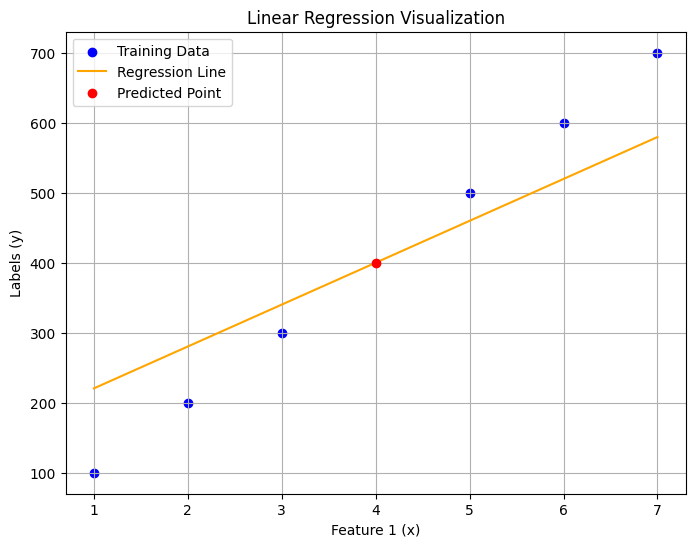

In [ ]:
import matplotlib.pyplot as plt

# Denormalize features and labels for plotting
features_denormalized = denormalize(features, features_mean, features_std)
labels_denormalized = denormalize(labels, labels_mean, labels_std)

# Plot training data
plt.figure(figsize=(8, 6))
plt.scatter(features_denormalized[:, 0], labels_denormalized, color='blue', label='Training Data')

# Generate regression line
x_range = np.linspace(features_denormalized[:, 0].min(), features_denormalized[:, 0].max(), 100)
x_range_normalized = (x_range - features_mean[0]) / features_std[0]
y_range_normalized = b + w[0] * x_range_normalized
y_range = denormalize(y_range_normalized, labels_mean, labels_std)
plt.plot(x_range, y_range, color='orange', label='Regression Line')

# Plot the predicted point
predicted_label = denormalize(predicted_label_normalized, labels_mean, labels_std)
plt.scatter(new_features[0], predicted_label, color='red', label='Predicted Point', zorder=5)

# Add labels and legend
plt.xlabel('Feature 1 (x)')
plt.ylabel('Labels (y)')
plt.title('Linear Regression Visualization')
plt.legend()
plt.grid(True)
plt.show()


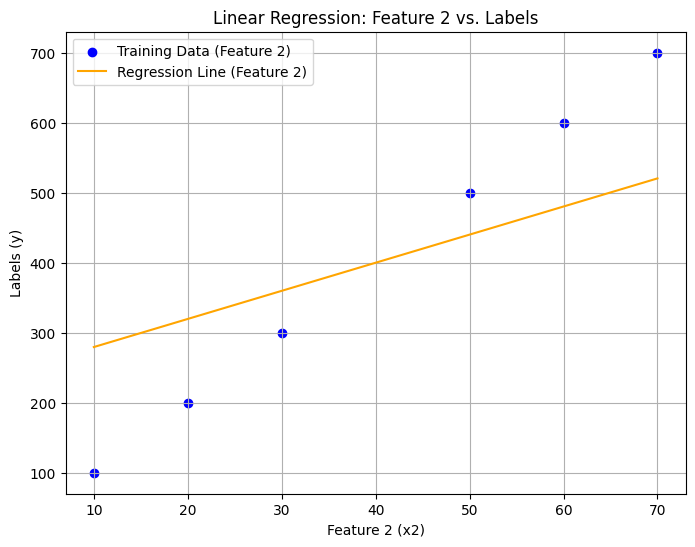

In [ ]:
# Second feature (x2) and corresponding labels
second_feature = features_denormalized[:, 1]  # Second feature (denormalized)
labels_denormalized = denormalize(labels, labels_mean, labels_std)  # Denormalized labels

# Regression line for second feature
x2_range = np.linspace(second_feature.min(), second_feature.max(), 100)
x2_range_normalized = (x2_range - features_mean[1]) / features_std[1]
y2_range_normalized = b + w[1] * x2_range_normalized
y2_range = denormalize(y2_range_normalized, labels_mean, labels_std)

# Plot the second feature vs. labels
plt.figure(figsize=(8, 6))
plt.scatter(second_feature, labels_denormalized, color='blue', label='Training Data (Feature 2)')
plt.plot(x2_range, y2_range, color='orange', label='Regression Line (Feature 2)')

# Add labels and legend
plt.xlabel('Feature 2 (x2)')
plt.ylabel('Labels (y)')
plt.title('Linear Regression: Feature 2 vs. Labels')
plt.legend()
plt.grid(True)
plt.show()


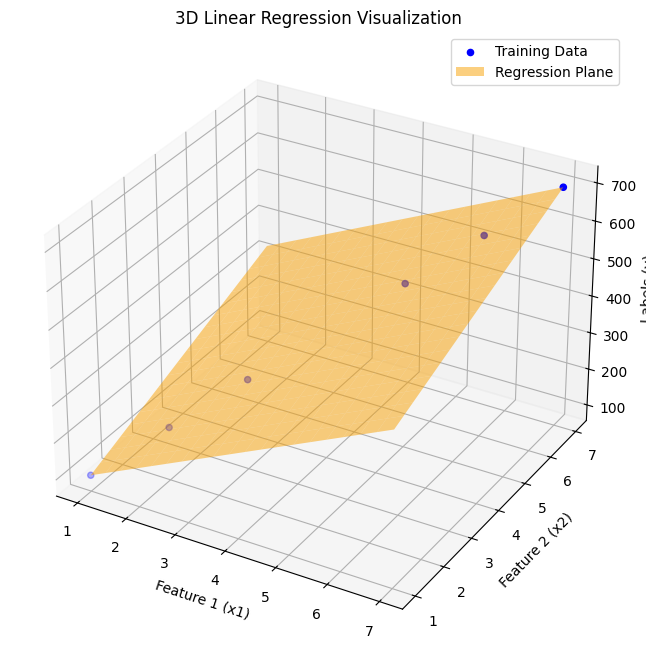

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Denormalize features and labels
features_denormalized = denormalize(features, features_mean, features_std)
labels_denormalized = denormalize(labels, labels_mean, labels_std)

# Create a grid for the regression plane
x1_range = np.linspace(features_denormalized[:, 0].min(), features_denormalized[:, 0].max(), 20)
x2_range = np.linspace(features_denormalized[:, 1].min(), features_denormalized[:, 1].max(), 20)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# Predict labels for the grid points
x1_grid_normalized = (x1_grid - features_mean[0]) / features_std[0]
x2_grid_normalized = (x2_grid - features_mean[1]) / features_std[1]
y_grid_normalized = b + w[0] * x1_grid_normalized + w[1] * x2_grid_normalized
y_grid = denormalize(y_grid_normalized, labels_mean, labels_std)

# Plot the 3D scatter and regression plane
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the training data
ax.scatter(features_denormalized[:, 0], features_denormalized[:, 1], labels_denormalized, color='blue', label='Training Data')

# Regression plane
ax.plot_surface(x1_grid, x2_grid, y_grid, color='orange', alpha=0.5, label='Regression Plane')

# Labels and legend
ax.set_xlabel('Feature 1 (x1)')
ax.set_ylabel('Feature 2 (x2)')
ax.set_zlabel('Labels (y)')
ax.set_title('3D Linear Regression Visualization')
plt.legend()
plt.show()
